# Barabási-model in R
the function named "barabasi" is an R implementation of the classical random graph.

In [1]:
barabasi<-function(m,n_step){
# parameters:
# input:
# m: how many old vertices are chosen at each step? (m>1)
# n_step: number of steps including the initial one
# output:
# edge: an array for storing the edges
# local:
# chosen: for temp storing
# i_edge: the idx of the last edge in edge

    n_edge<-((n_step-1)*m+(m*(m-1))/2)
    edge<-vector('integer',2*n_edge)
    dim(edge)<-c(n_edge,2)
    chosen<-vector('integer',m)
    i_edge<-0

# initial step, inserting a complete m-graph
    for(it in 1:(m-1)){ #4:2 is 4,3,2!
        for(jt in (it+1):m){
            i_edge<-i_edge+1
            edge[i_edge,]<-c(it,jt)
        }
    }
    i_vertex<-m

# generating the graf
    for(i_step in 2:n_step){
# choosing the future neighbours for the new one
        i_m<-0
        while(i_m<m){
            v<-edge[1+floor(i_edge*runif(1)),1+floor(2*runif(1))]
            it<-1;
            while(it<=i_m){
                if(chosen[it]==v){
                    break
                }
                it<-it+1
            }
            if(it>i_m){
                i_m<-i_m+1
                chosen[i_m]<-v
            }
        }

# inserting the new edges
        i_vertex<-i_vertex+1
        for(i_m in 1:m){
            i_edge<-i_edge+1
            edge[i_edge,]=c(chosen[i_m],i_vertex);
        }
    }
    return(edge)
} #function

generating the graph with parameters below:

In [2]:
m<-3
n_step<-30000;
system.time(edge<-barabasi(m, n_step))
write(t(edge),ncolumns = 2,'edgelist_R')

   user  system elapsed 
  1.640   0.000   1.679 

plotting the degree distribution in loglog scale:

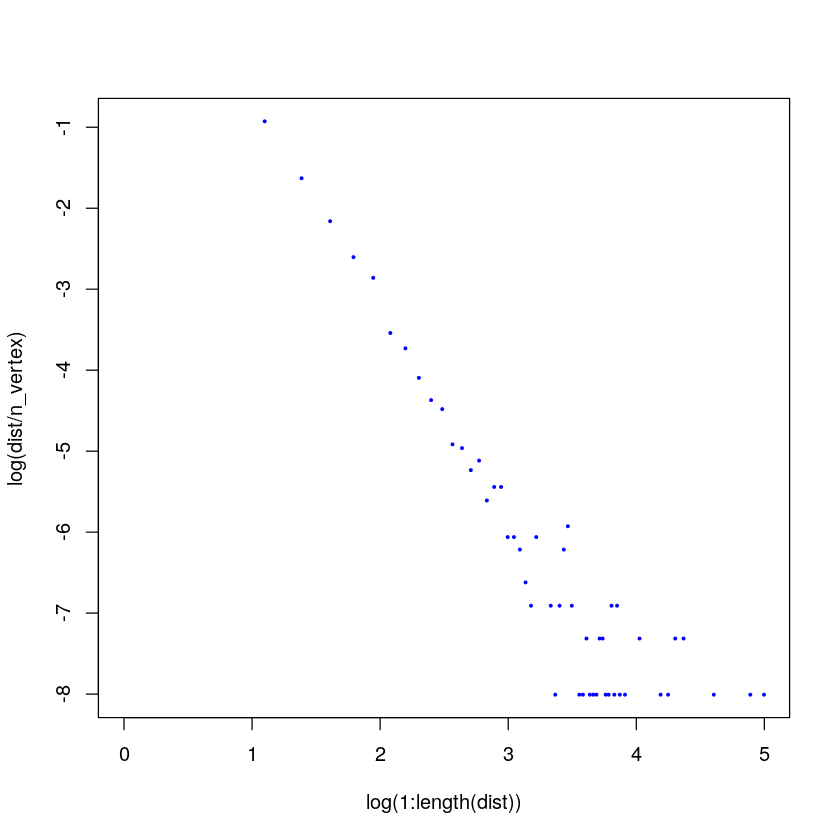

In [47]:
n_edge<-((n_step-1)*m+(m*(m-1))/2)
n_vertex<-m+n_step-1
dim(edge)=c(2*n_edge,1)
dist=tabulate(tabulate(edge))
plot(log(1:length(dist)),log(dist/n_vertex),pch=19,cex=0.3,col=4)